In [1]:
import os
from importlib_metadata import version
import urllib
import cv2
import numpy as np
import pixellib
from pixellib.semantic import semantic_segmentation
from pixellib.instance import instance_segmentation

from matplotlib import pyplot as plt
import tensorflow as tf
import keras
import pixellib
print(cv2.__version__)
print(version('pixellib'))

4.6.0
0.7.1


## 다양한 모델 이용해보기

In [11]:
local_dir = os.getcwd()
model_dir = local_dir +'/data/models'
pointrend_resnet101_model_file = os.path.join(model_dir, 'pointrend_resnet101.pkl')
deeplabv3_model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
mask_rcnn_coco_model_file = os.path.join(model_dir,'mask_rcnn_coco.h5')

In [13]:
# 모델 파일이 없는 경우만 실행
pointrend_resnet101_model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/0.2.0/pointrend_resnet101.pkl'
deeplabv3_model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
mask_rcnn_coco_model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5'

model_list_file = [pointrend_resnet101_model_file, deeplabv3_model_file, mask_rcnn_coco_model_file]
model_list_url = [pointrend_resnet101_model_url, deeplabv3_model_url, mask_rcnn_coco_model_url]


for index, file in enumerate(model_list_file):
    print(file, index)
    urllib.request.urlretrieve(model_list_url[index], file)


/root/aiffel/online2nd_pss/exploration09/data/models/pointrend_resnet101.pkl 0
/root/aiffel/online2nd_pss/exploration09/data/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5 1
/root/aiffel/online2nd_pss/exploration09/data/models/mask_rcnn_coco.h5 2


segmentation에는 2가지 종류가 있다.
intance와 semantic의 차이


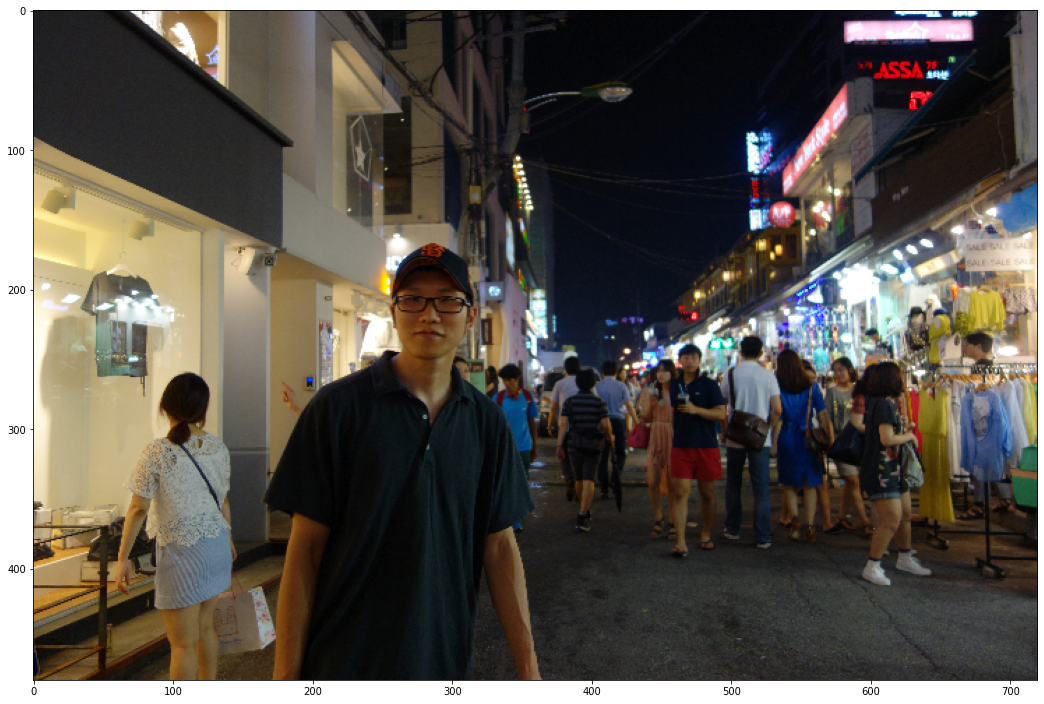

In [12]:
#image resize
img1_path = os.getcwd()+'/data/DSC01044.JPG'
img1 = cv2.imread(img1_path)
resize_img = cv2.resize(img1, (720, 480))
cv2.imwrite(os.getcwd()+'/data/DSC01044_resize.JPG', resize_img)
plt.figure(figsize=(18,24))
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
model = instance_segmentation()
model.load_model(mask_rcnn_coco_model_file)
segvalues, output = model.segmentImage(os.getcwd()+'/data/DSC01044_resize.JPG',  show_bboxes = False)

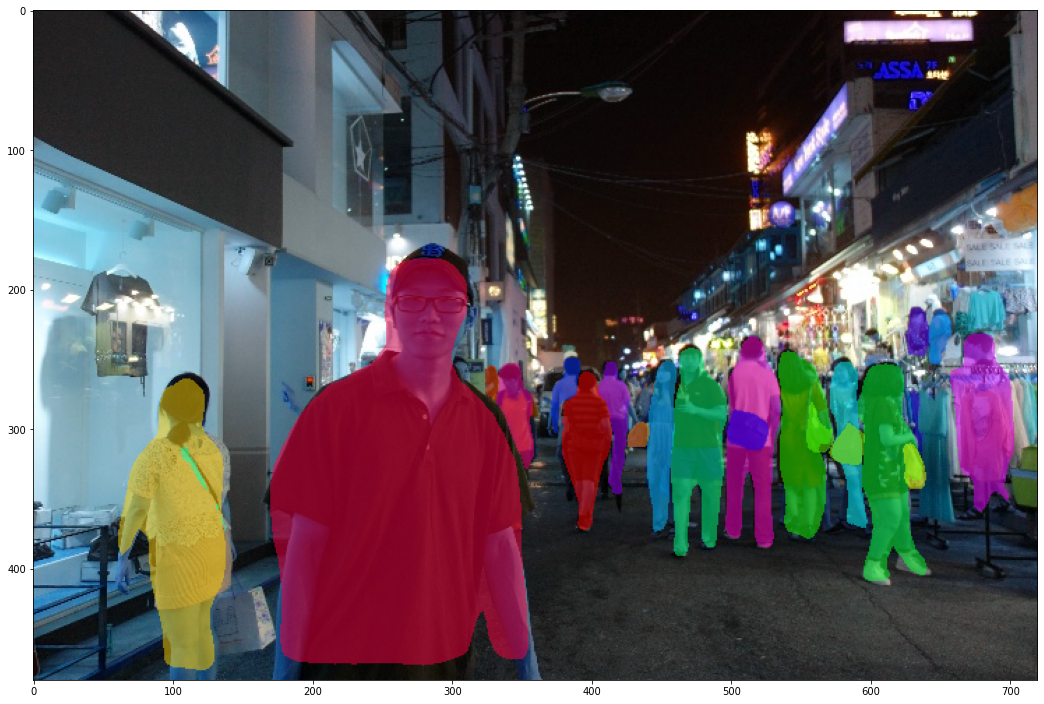

In [17]:
plt.figure(figsize=(18,24))
plt.imshow(output)
plt.show()

mask_rcnn_coco 는 별로다

In [18]:
model2 = instance_segmentation()
model2.load_model(pointrend_resnet101_model_file)
segvalues2, output2 = model2.segmentImage(os.getcwd()+'/data/DSC01044_resize.JPG',  show_bboxes = False)

OSError: Unable to open file (file signature not found)

pkl 파일은 파이토치에서만 열리는것 같다.

In [27]:
model3 = semantic_segmentation()
model3.load_pascalvoc_model(deeplabv3_model_file)
segvalues3, output3 = model3.segmentAsPascalvoc(os.getcwd()+'/data/DSC01044_resize.JPG')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [39]:
print(segvalues3)

{'class_ids': array([ 0, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}


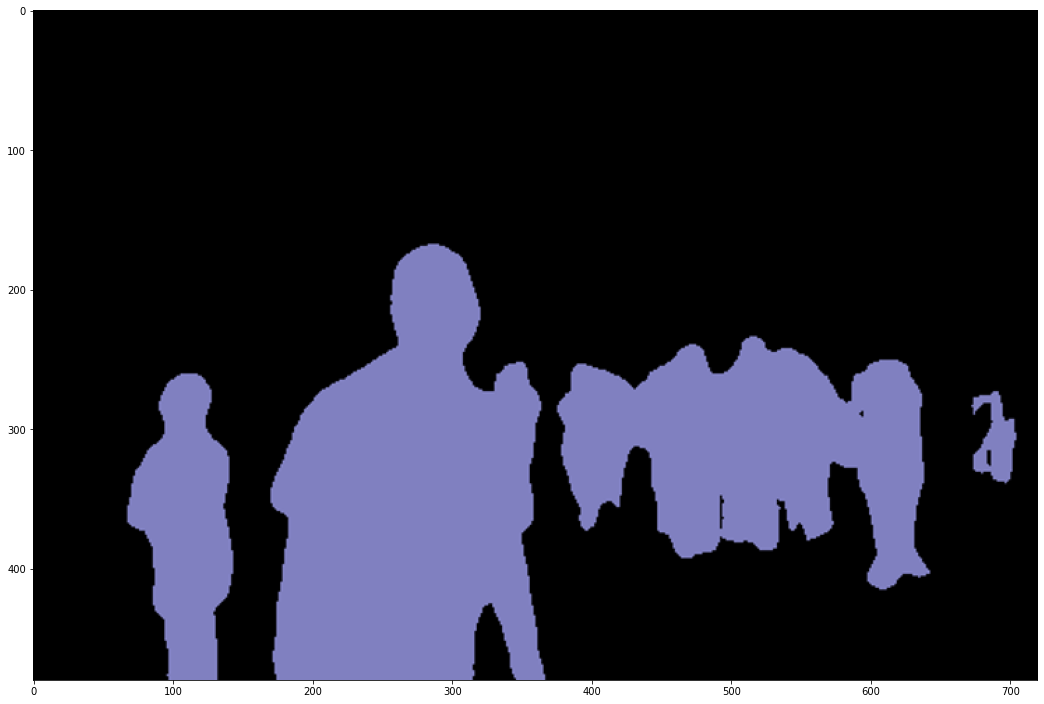

In [28]:
plt.figure(figsize=(18,24))
plt.imshow(output3)
plt.show()

In [34]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [35]:
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [36]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [40]:
colormap[15]

array([192, 128, 128])

In [46]:
seg_color = (128,128,192)
seg_map = np.all(output3==seg_color, axis=-1) 

(480, 720)


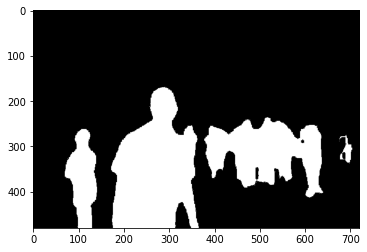

In [47]:
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

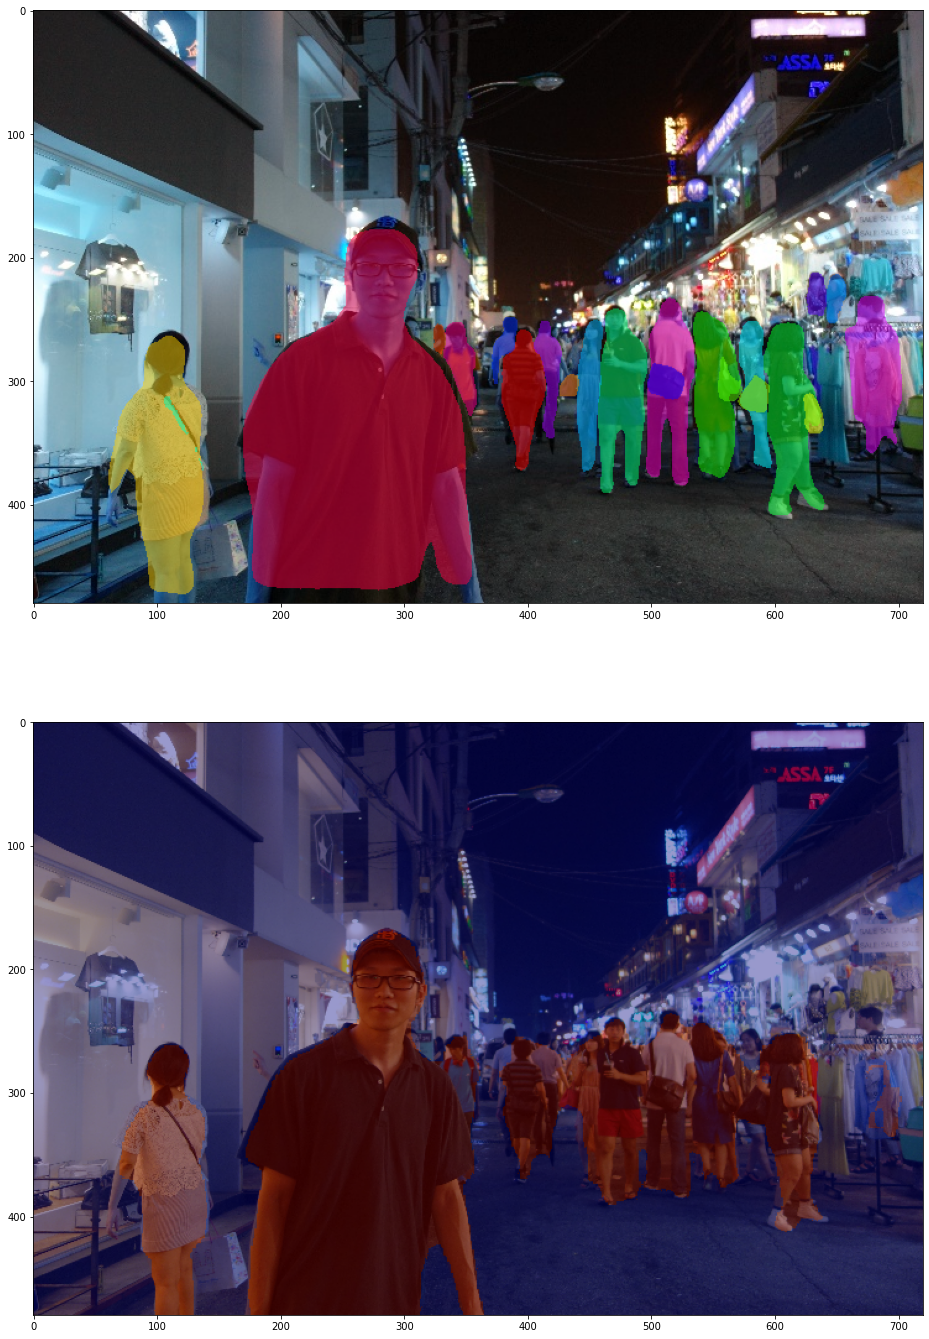

In [48]:
plt.figure(figsize=(18,24))

plt.subplot(2, 1, 1)
plt.imshow(output)

plt.subplot(2, 1, 2)
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력

img_show = resize_img.copy()
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

deeplabv3가 조금더 좋은 결과를 보이는것 같다.

In [51]:
xception_pascalvoc_file = os.path.join(model_dir, 'xception_pascalvoc.pb')
xception_pascalvoc_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/xception_pascalvoc.pb'

urllib.request.urlretrieve(xception_pascalvoc_url, xception_pascalvoc_file)

('/root/aiffel/online2nd_pss/exploration09/data/models/xception_pascalvoc.pb',
 <http.client.HTTPMessage at 0x7f42ff7e1e48>)

In [52]:
from pixellib.tune_bg import alter_bg

change_bg = alter_bg(model_type = "pb")
change_bg.load_pascalvoc_model(xception_pascalvoc_file)
output4 = change_bg.blur_bg(os.getcwd()+'/data/DSC01044_resize.JPG', extreme = True, detect = "person")

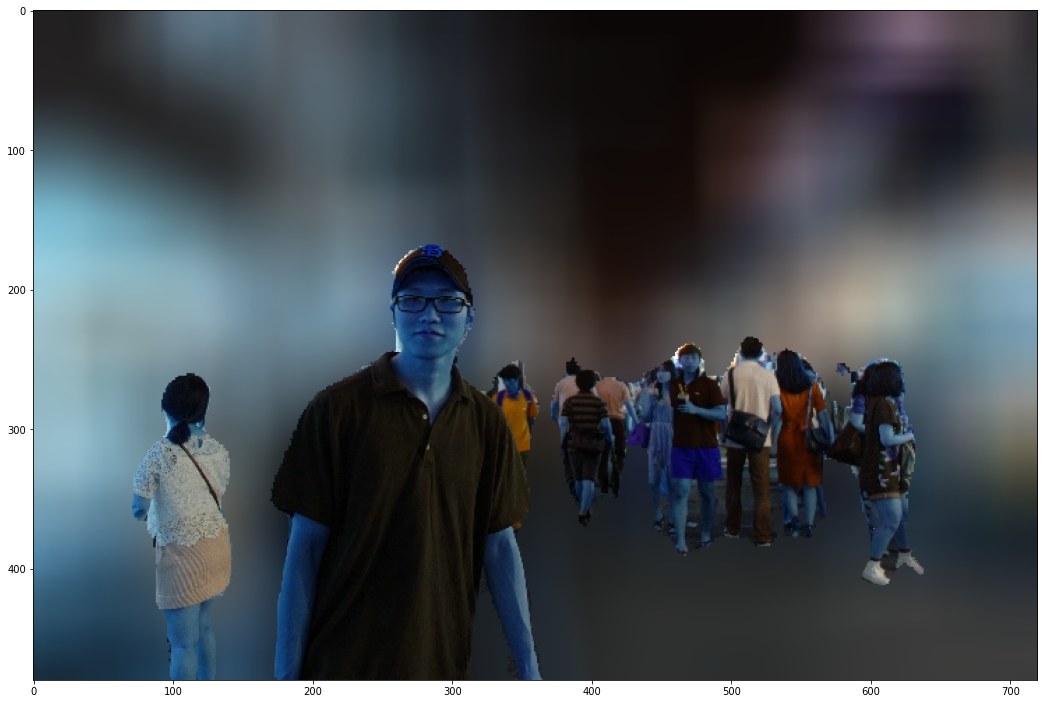

In [53]:
plt.figure(figsize=(18,24))
plt.imshow(output4)
plt.show()